BLEU {'0-shot': 39.25, '2-shot': 46.21, '5-shot': 46.52}
0-shot 39.25
2-shot 46.21
5-shot 46.52
CHRF {'0-shot': 57.27, '2-shot': 62.38, '5-shot': 62.37}
0-shot 57.27
2-shot 62.38
5-shot 62.37
TER {'0-shot': 60.84, '2-shot': 55.16, '5-shot': 56.7}
0-shot 60.84
2-shot 55.16
5-shot 56.7


/netscratch/mhannani/adaptive/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/netscratch/mhannani/adaptive/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/netscratch/mhannani/adaptive/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/netscratch/mhannani/adaptive/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/netscratch/mhannani/adaptive/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` f

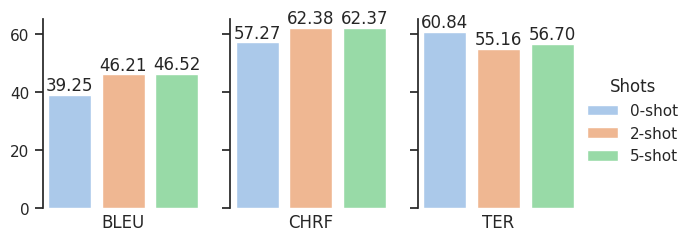

In [2]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the specific metric values for each subplot
# values = {
#     '0-shot': {
#         'BLEU': 28.68,
#         'CHRF': 54.34,
#         'TER': 95.86
#     },
#     '2-shot': {
#         'BLEU': 30.37,
#         'CHRF': 56.22,
#         'TER': 92.81
#     },
#     '5-shot': {
#         'BLEU': 32.11,
#         'CHRF': 57.84,
#         'TER': 91.1
#     }
# }

values = {
    'BLEU': {
        '0-shot': 39.25,
        '2-shot': 46.21,
        '5-shot': 46.52
    },
    'CHRF': {
        '0-shot': 57.27,
        '2-shot': 62.38,
        '5-shot': 62.37
    },
    'TER': {
        '0-shot': 60.84,
        '2-shot': 55.16,
        '5-shot': 56.70
    }
}

# Create a DataFrame from the values
data = []
# for shot, metrics in values.items():
#     for metric, value in metrics.items():
#         data.extend([{'Shot': shot, 'Scores': metric, 'Value': value}] * 100)  # Repeat for each bin

for metric, shots in values.items():
    print(metric, shots)
    for shot, value in shots.items():
        print(shot, value)
        # print(data)
        data.extend([{'Metric': metric, 'Shots': shot, 'Value': value}] * 100)  # Repeat for each bin


df = pd.DataFrame(data)

# Set the style to remove the background grid and x-axis line
sns.set(style='ticks')  # You can also use 'ticks' for a different style
sns.set_palette('pastel')

# Plot bar plots for each metric within each subplot
g = sns.FacetGrid(df, col='Metric', hue='Shots', sharex=False, aspect=0.7)  # Adjust the aspect here
g.map(sns.barplot, 'Shots', 'Value', err_kws={'color': 'black'}, order=['0-shot', '2-shot', '5-shot'], ci=None)

# Customize the legend
g.add_legend(title='Shots')

# Remove x-axis ticks and labels
g.set(xticks=[], xticklabels=[])

# Set custom subtitles under each subplot
titles = ["BLEU", "CHRF", "TER"]

for ax, title in zip(g.axes.flat, titles):
    ax.set_xlabel(title)

# Remove titles above each subplot
g.set_titles("")

# Remove x-axis labels for each bin ('Bleu', 'Charf', 'Ter')
for ax in g.axes.flat:
    ax.set_xticklabels([])

# Annotate the bars with score values inside each bin
for ax in g.axes.flat:
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%.2f', label_type='edge')

# Remove the x-axis line (bottom spine) for each subplot
for ax in g.axes.flat:
    ax.spines['bottom'].set_visible(False)

# Remove the y-axis label ("Value")
for ax in g.axes.flat:
    ax.set_ylabel("")

# Save the plot as an image file (e.g., PNG)
plt.savefig('chatgpt.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
